In [1]:
import sys
import tensorflow as tf
sys.path.append("/aiffel/aiffel/Blindless/CODE/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/aiffel/aiffel/Blindless/CODE/Models/Pyramid")
import Pyramid

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'Pyramid_30ep_1024_fG'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/aiffel/aiffel/Blindless/DATA'

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 512, 512, 16)         32        ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          16        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 16)         160       ['input_1[0][0]']             
                                                                                              

 gePooling2D)                                                                                     
                                                                                                  
 conv2d_20 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d[0][0]']   
                                                                                                  
 conv2d_21 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_1[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)          (None, 8, 8, 32)             4128      ['average_pooling2d_2[0][0]'] 
                                                                                                  
 conv2d_23 (Conv2D)          (None, 4, 4, 32)             4128      ['average_pooling2d_3[0][0]'] 
                                                                                                  
 conv2d_tr

                                                                                                  
 average_pooling2d_11 (Aver  (None, 16, 16, 128)          0         ['conv2d_transpose_9[0][0]']  
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_28 (Conv2D)          (None, 128, 128, 32)         4128      ['average_pooling2d_8[0][0]'] 
                                                                                                  
 conv2d_29 (Conv2D)          (None, 64, 64, 32)           4128      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 conv2d_30 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d_10[0][0]']
                                                                                                  
 conv2d_31

Total params: 1300305 (4.96 MB)
Trainable params: 1300305 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0],is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = Pyramid.unet_model(INPUT_SHAPE)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 1024, 1024, 16)       32        ['input_2[0][0]']             
                                                                                                  
 conv2d_37 (Conv2D)          (None, 1024, 1024, 8)        16        ['input_2[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)          (None, 1024, 1024, 16)       160       ['input_2[0][0]']             
                                                                                            

 agePooling2D)                                                                                    
                                                                                                  
 conv2d_57 (Conv2D)          (None, 64, 64, 32)           4128      ['average_pooling2d_16[0][0]']
                                                                                                  
 conv2d_58 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d_17[0][0]']
                                                                                                  
 conv2d_59 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_18[0][0]']
                                                                                                  
 conv2d_60 (Conv2D)          (None, 8, 8, 32)             4128      ['average_pooling2d_19[0][0]']
                                                                                                  
 conv2d_tr

                                                                                                  
 average_pooling2d_27 (Aver  (None, 32, 32, 128)          0         ['conv2d_transpose_29[0][0]'] 
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_65 (Conv2D)          (None, 256, 256, 32)         4128      ['average_pooling2d_24[0][0]']
                                                                                                  
 conv2d_66 (Conv2D)          (None, 128, 128, 32)         4128      ['average_pooling2d_25[0][0]']
                                                                                                  
 conv2d_67 (Conv2D)          (None, 64, 64, 32)           4128      ['average_pooling2d_26[0][0]']
                                                                                                  
 conv2d_68

Total params: 1300305 (4.96 MB)
Trainable params: 1300305 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [4]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

Epoch 1/30
295/295 [==============================] - 361s 1s/step - loss: 0.5758 - sensitivity: 0.2964 - specificity: 0.9648 - accuracy: 0.9185 - val_loss: 0.3893 - val_sensitivity: 0.6124 - val_specificity: 0.9590 - val_accuracy: 0.9347

Epoch 00001: val_sensitivity improved from -inf to 0.61238, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parametersPyramid_30ep_1024_fG.h5
Epoch 2/30
295/295 [==============================] - 312s 1s/step - loss: 0.3679 - sensitivity: 0.5899 - specificity: 0.9672 - accuracy: 0.9412 - val_loss: 0.3399 - val_sensitivity: 0.6813 - val_specificity: 0.9590 - val_accuracy: 0.9396

Epoch 00002: val_sensitivity improved from 0.61238 to 0.68128, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parametersPyramid_30ep_1024_fG.h5
Epoch 3/30
295/295 [==============================] - 303s 1s/step - loss: 0.3324 - sensitivity: 0.6314 - specificity: 0.9697 - accuracy: 0.9465 - val_loss: 0.3077 - val_sensitivity: 0.6599 - val

125/125 [==============================] - 889s 7s/step - loss: 0.2398 - sensitivity: 0.7991 - specificity: 0.9698 - accuracy: 0.9581
Loss: 0.23982343077659607
Sensitivity: 0.7991122603416443
Specificity: 0.9698183536529541
Accuracy: 0.9581410884857178


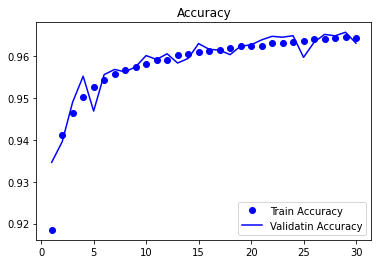

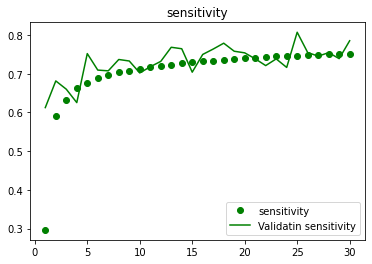

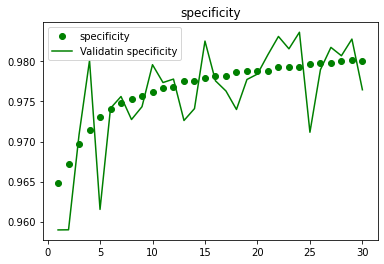

<Figure size 432x288 with 0 Axes>

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

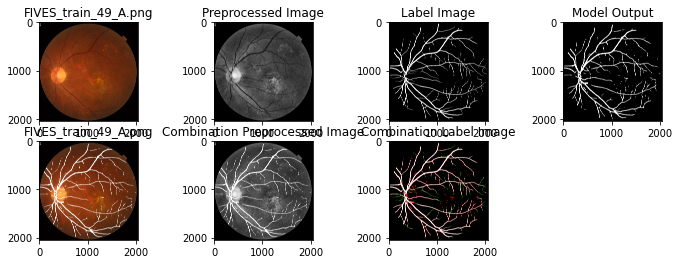

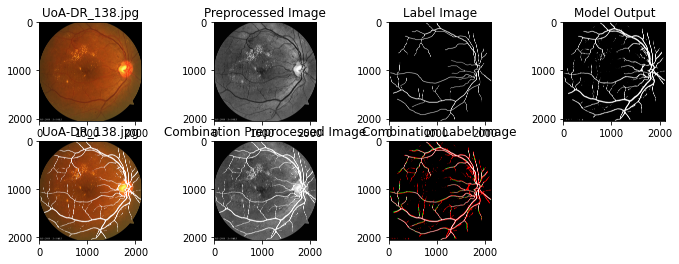

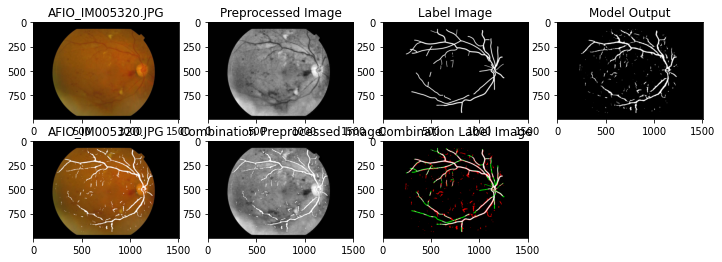

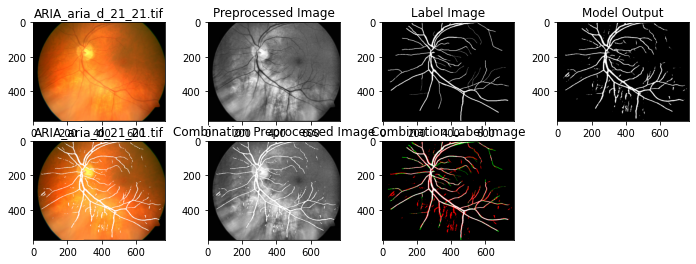

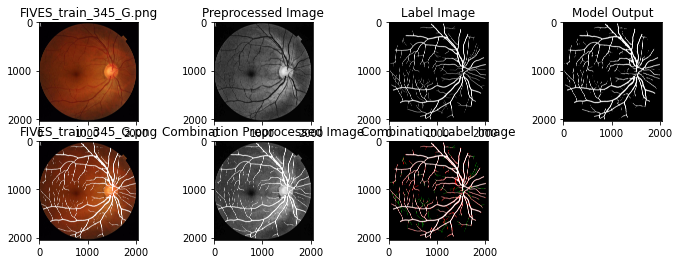

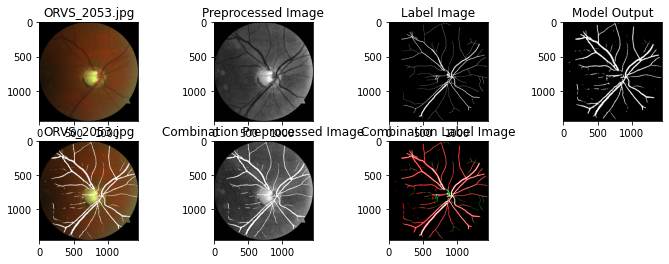

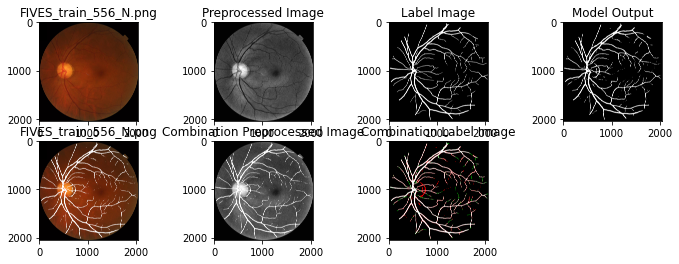

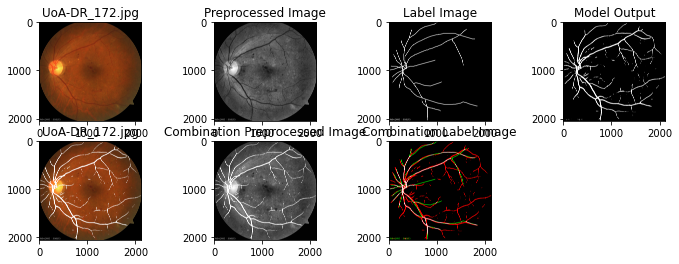

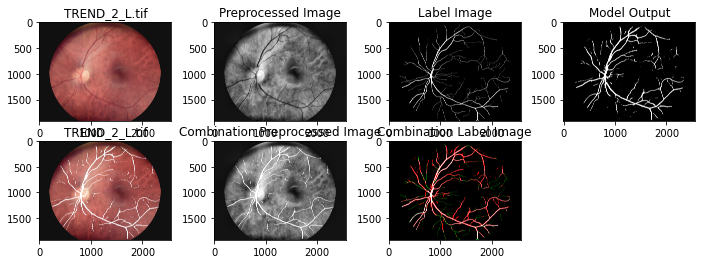

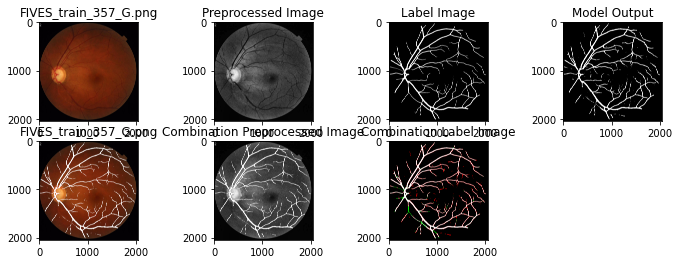

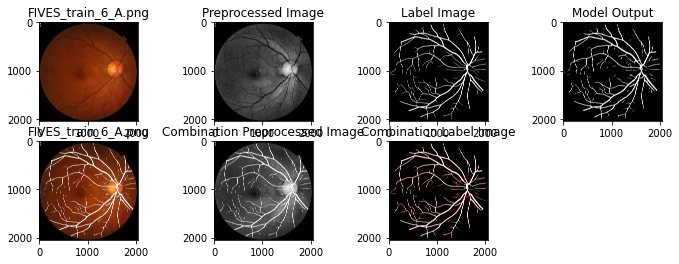

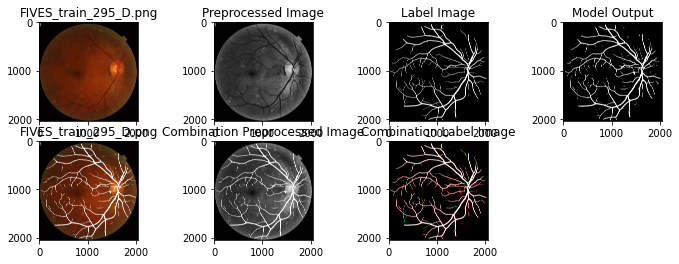

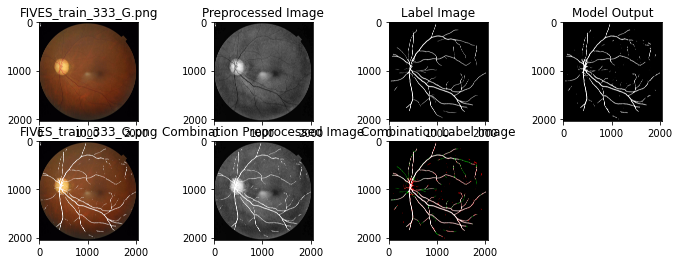

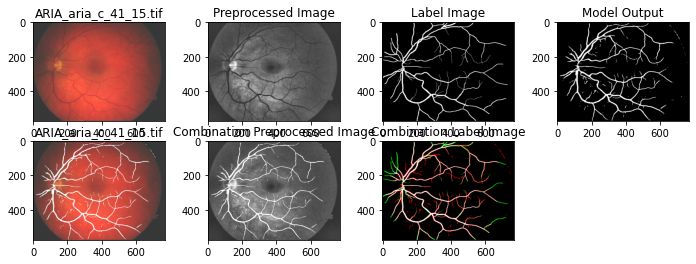

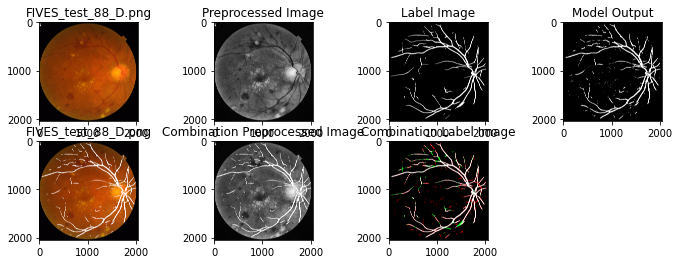

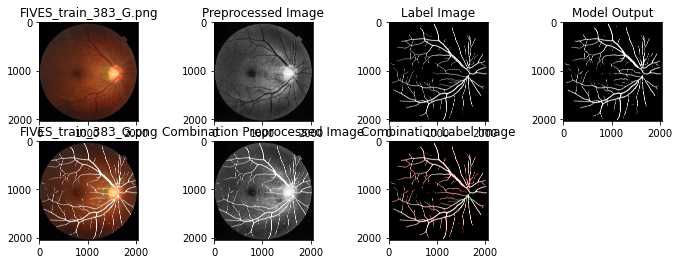

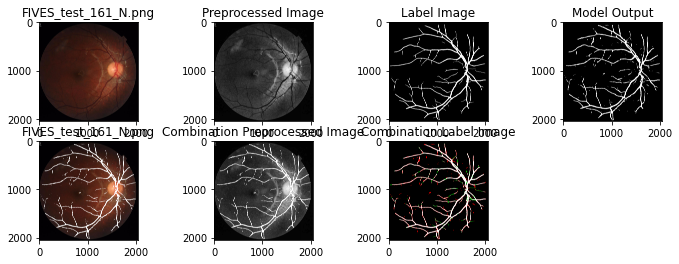

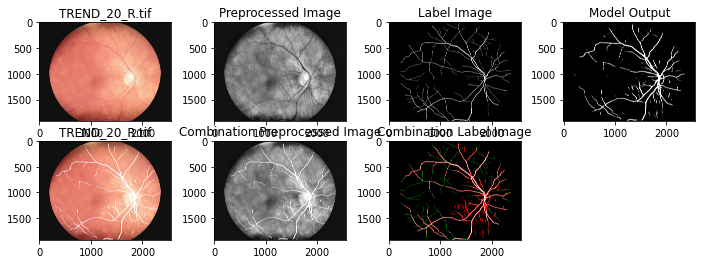

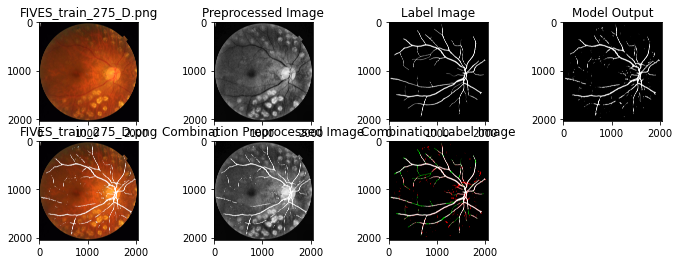

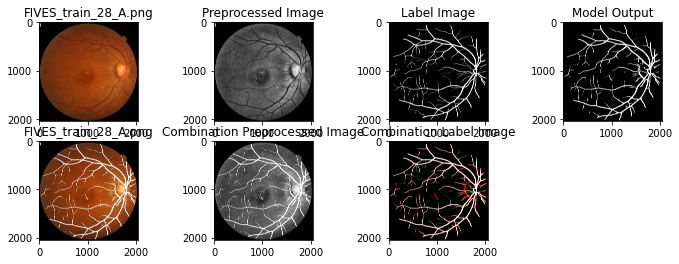

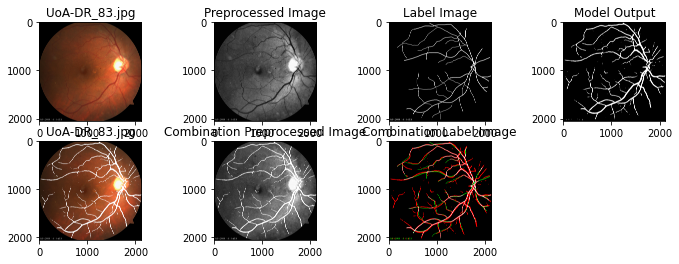

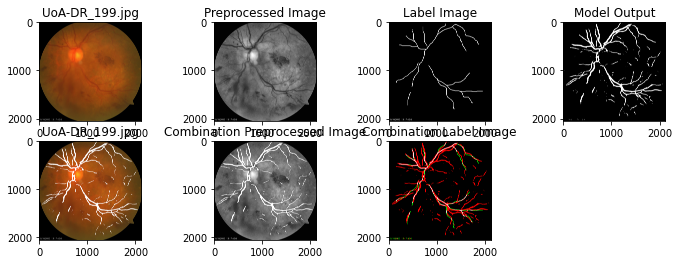

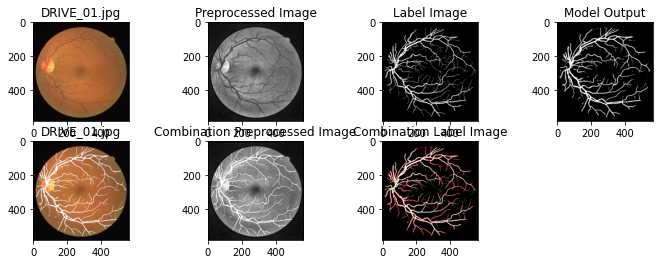

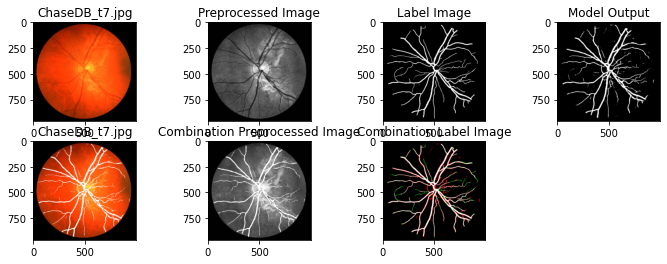

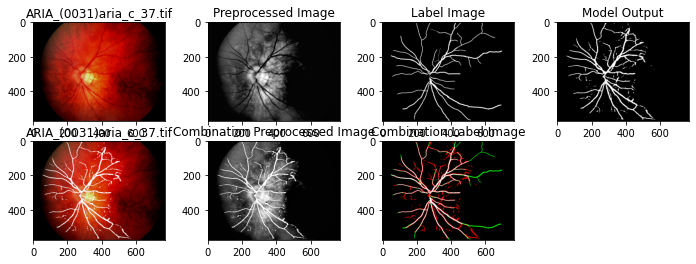

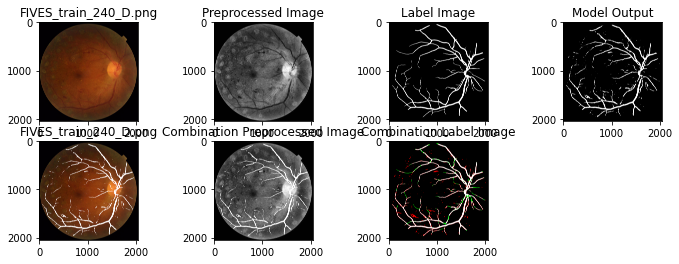

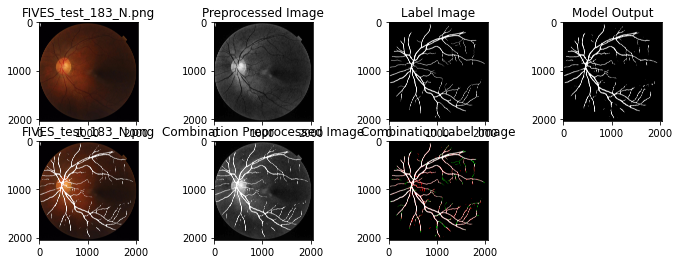

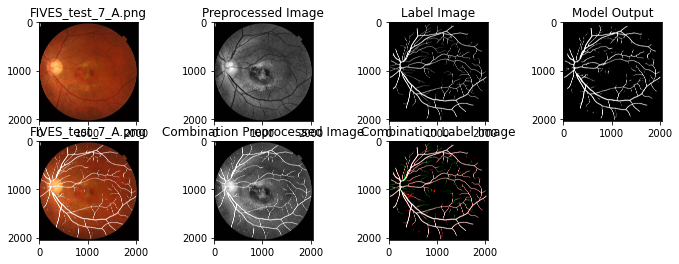

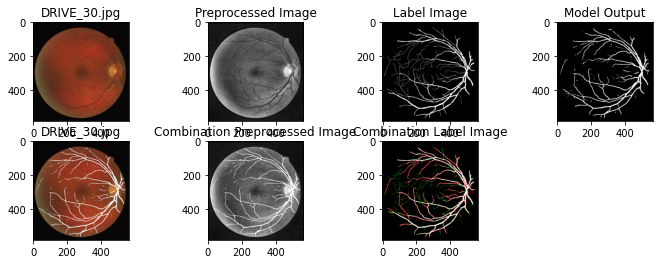

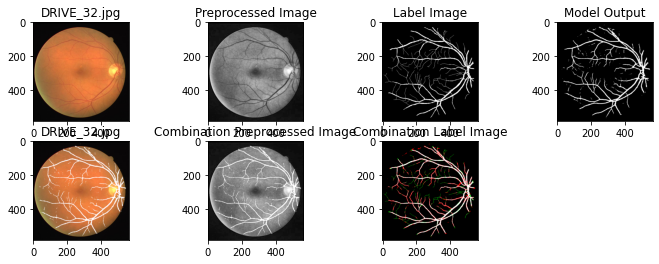

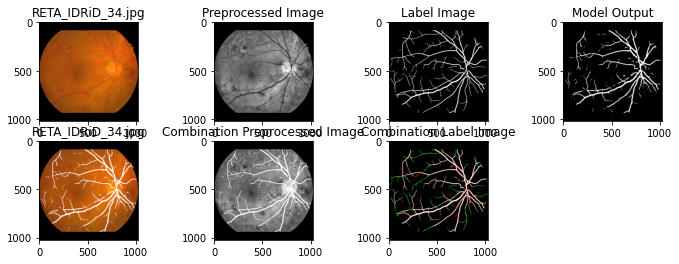

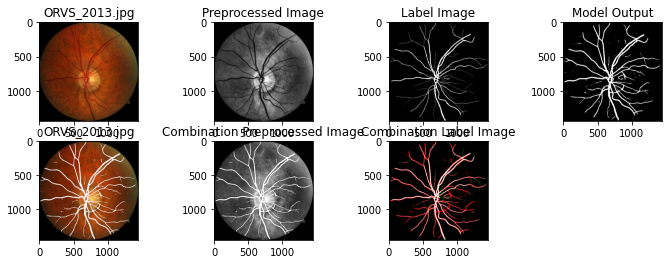

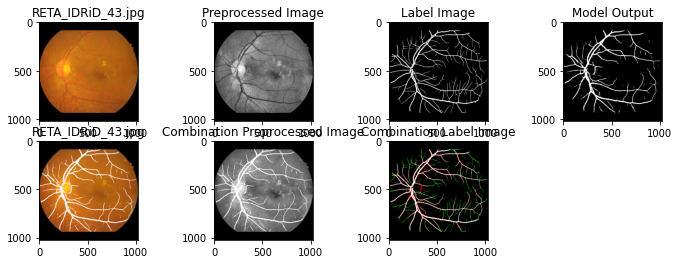

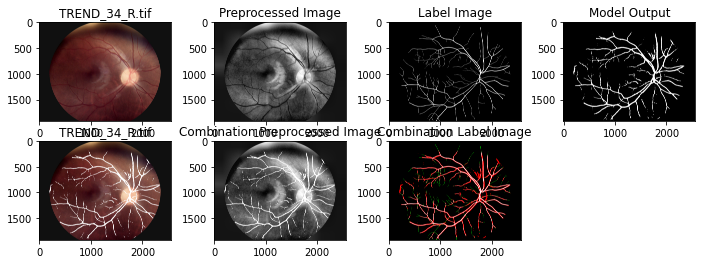

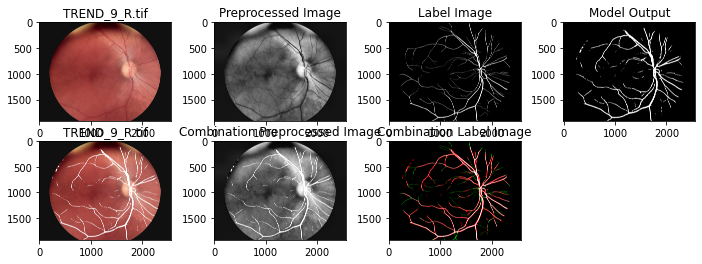

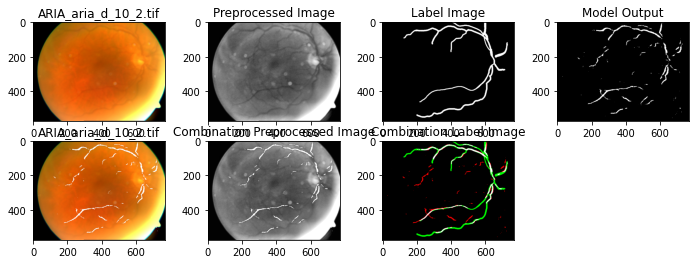

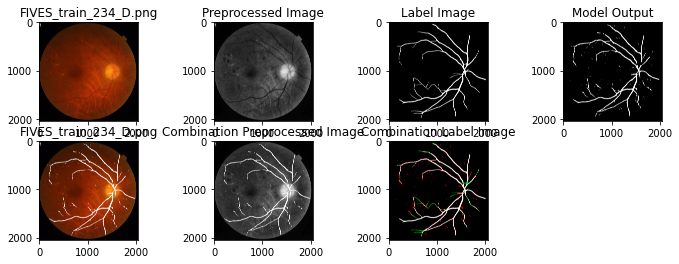

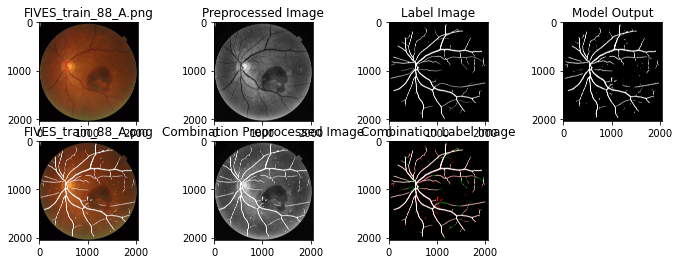

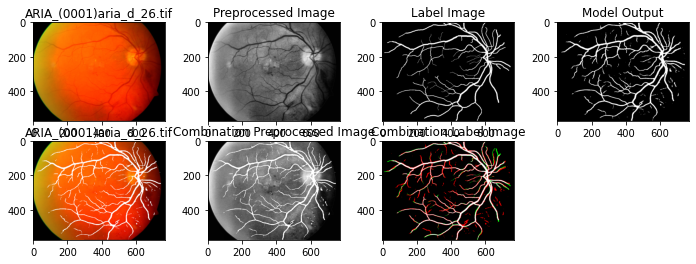

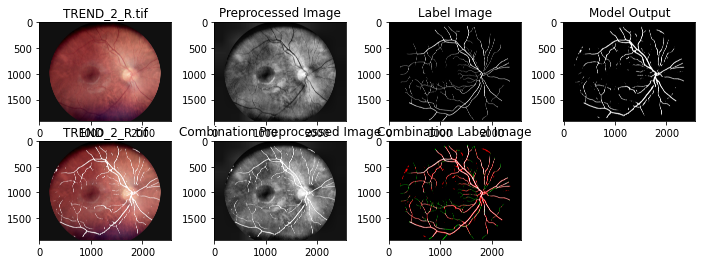

In [5]:
# Plot model result
num_images_to_select = 40
label_img, output_img = check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)

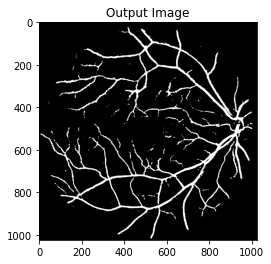

In [11]:
import matplotlib.pyplot as plt

# output_img가 2D NumPy 배열일 때
plt.imshow(output_img, cmap='gray')
plt.title('Output Image')
plt.show()


In [13]:
output_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
output_img.shape

(1024, 1024)

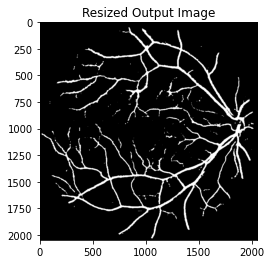

In [17]:
import cv2
import matplotlib.pyplot as plt

# output_img가 2D NumPy 배열일 때
resized_output_img = cv2.resize(output_img, (2048, 2048), interpolation=cv2.INTER_LINEAR)

# 시각화
plt.imshow(resized_output_img, cmap='gray')
plt.title('Resized Output Image')
plt.show()


In [18]:
resized_output_img.shape

(2048, 2048)

In [22]:
import numpy as np

color = np.unique(resized_output_img)
color

array([  0,  16,  48,  64,  96, 112, 143, 159, 191, 207, 239, 255],
      dtype=uint8)

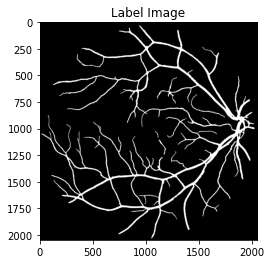

In [12]:
import matplotlib.pyplot as plt

# output_img가 2D NumPy 배열일 때
plt.imshow(label_img, cmap='gray')
plt.title('Label Image')
plt.show()

In [14]:
label_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
label_img.shape

(2048, 2048)

In [23]:
import numpy as np

color = np.unique(label_img)
color

array([  0, 255], dtype=uint8)

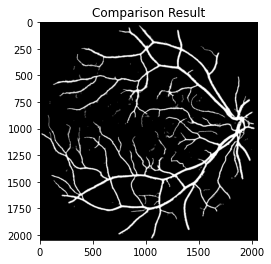

In [24]:
import numpy as np

def compare_images(label_img, resized_output_img):
    # Initialize a new image with zeros
    result_img = np.zeros_like(label_img)

    # Condition 1: label_img and resized_output_img are both non-zero
    condition1 = (label_img != 0) & (resized_output_img != 0)
    result_img[condition1] = 255

    # Condition 2: label_img is zero, resized_output_img is non-zero
    condition2 = (label_img == 0) & (resized_output_img != 0)
    result_img[condition2] = 100

    # Condition 3: label_img is non-zero, resized_output_img is zero
    condition3 = (label_img != 0) & (resized_output_img == 0)
    result_img[condition3] = 200

    return result_img

# Example usage
result_image = compare_images(label_img, resized_output_img)

# Visualize the result
plt.imshow(result_image, cmap='gray')
plt.title('Comparison Result')
plt.show()


In [25]:
color = np.unique(result_image) # 100 => 노이즈(빨간색) // 200 => 미세혈관 (초록색)
color

array([  0, 100, 200, 255], dtype=uint8)

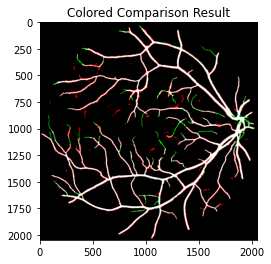

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def create_colored_image(result_img):
    # Create a blank RGB image
    colored_image = np.zeros((result_img.shape[0], result_img.shape[1], 3), dtype=np.uint8)

    # Set colors based on pixel values
    colored_image[result_img == 0] = [0, 0, 0]       # Black
    colored_image[result_img == 100] = [255, 0, 0]    # Red
    colored_image[result_img == 200] = [0, 255, 0]    # Blue
    colored_image[result_img == 255] = [255, 255, 255] # White

    return colored_image

# Example usage
colored_result_image = create_colored_image(result_image)

# Visualize the colored result
plt.imshow(colored_result_image)
plt.title('Colored Comparison Result')
plt.show()


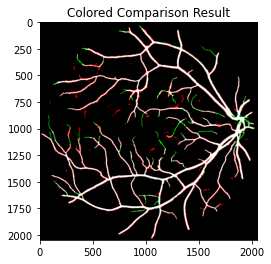

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def combine_label_with_output(label, output):
    # Initialize a new image with zeros
    
    output = cv2.resize(output, (label.shape[1], label.shape[0]))
    result_img = np.zeros_like(label)

    # Condition 1: label and output are both non-zero
    condition1 = (label != 0) & (output != 0)
    result_img[condition1] = 255

    # Condition 2: label is zero, output is non-zero
    condition2 = (label == 0) & (output != 0)
    result_img[condition2] = 100

    # Condition 3: label is non-zero, output is zero
    condition3 = (label != 0) & (output == 0)
    result_img[condition3] = 200

    # Create a blank RGB image
    colored_image = np.zeros((result_img.shape[0], result_img.shape[1], 3), dtype=np.uint8)

    # Set colors based on pixel values
    colored_image[result_img == 0] = [0, 0, 0]       # Black
    colored_image[result_img == 100] = [255, 0, 0]    # Red
    colored_image[result_img == 200] = [0, 255, 0]    # Green (Changed from Blu
    colored_image[result_img == 255] = [255, 255, 255] # White

    return colored_image

# Example usage
colored_result_image = combine_label_with_output(label_img, resized_output_img)

# Visualize the colored result
plt.imshow(colored_result_image)
plt.title('Colored Comparison Result')
plt.show()


In [ ]:
def combine_label_with_output(label, output):
    # Resize the output to match the label size (assuming label and output have the same size)
    output_resized = cv2.resize(output, (label.shape[1], label.shape[0]))
    
    # Create a mask for white regions in the label
    mask_label_white = (label == 255).astype(np.uint8)

    # Create a mask for white regions in the output
    mask_output_white = (output_resized == 255).astype(np.uint8)

    # Create a mask for common white regions in both label and output
    mask_common_white = np.minimum(mask_label_white, mask_output_white)
    
    combined = np.zeros_like(label)
    
    # Set white for common white regions in both label and output
    combined[mask_common_white == 1] = 255

    # Set green for white regions in label
    combined[mask_label_white == 1] = 50  # Green (BGR)

    # Set blue for white regions in output
    combined[mask_output_white == 1] = 200  # Blue (BGR)
    combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
    
    return combined_rgb
    
    output_resized = cv2.resize(output, (label.shape[1], label.shape[0]))
    
    return output_resized